# Dark Matter Notebook

Authors: Alicia Savelli, Nathan Carlson, Tanveer Karim, J. Ted Mackereth

In [ ]:
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

The cell below is necessary for you to be able to work with the simulation data in this notebook.  It will open a pop up window and you just need to follow the prompts!

In [ ]:
# # if  you want to produce 3D plots, run the following cell and then the cell after that
# !pip install plotly==5.20.0

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

We will have to gain access to the data we will be using in this project. To do that, go to [this Google drive folder](https://drive.google.com/drive/folders/1i6dkI7i-bmS3u5DXNryPk6WPP93H8XSw?usp=drive_link), and download the 5 data files. Then, upload them to this "colab environment" by clicking the image of a folder in the left side bar, then clicking the upload button (see the figure below for help). Note that it may take a while for ```zoom_out.pickle``` to upload, and you won't be able to load it in below until it's completed!  It should show a blue progress circle as the files are uploading so you can keep track of how far along the process is.
[![Screenshot-2024-07-02-at-3-41-48-PM.png](https://i.postimg.cc/BvdzZ3F6/Screenshot-2024-07-02-at-3-41-48-PM.png)](https://postimg.cc/d7j6nz4P)

## History of Dark Matter

$$\require{cancel}$$
To understand what physicists and astronomers mean by *dark matter*, we have to take a quick historical detour. Like almost all foundational discoveries in astronomy, the existence of dark matter became evident through observation, and not from theoretical research.

While [Vera Rubin](https://en.wikipedia.org/wiki/Vera_Rubin) first found the conclusive evidence of dark matter by studying the rotation curve of galaxies (which we will be doing too in this notebook!) in $1970$<sup>1</sup>, the idea is not new.

![Coma Cluster](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Coma_cluster_leo.jpg/2560px-Coma_cluster_leo.jpg "Coma Cluster")

*Photo of the Coma Cluster*


The first inkling of its existence came from [Fritz Zwicky](https://en.wikipedia.org/wiki/Fritz_Zwicky) in $1933$ <sup>2</sup>. Zwicky was studying the beautiful Coma Cluster, specifically the motions of its constituent galaxies at that time. Galaxies, like our galaxy, the Milky Way, are collections of stars (and the planets that orbit around them), as well as vast clouds of gas and dust, all held together by gravity. You've almost certainly seen pictures of beautiful [spiral galaxies](https://en.wikipedia.org/wiki/Spiral_galaxy) with their swriling arms of dark gas where new stars are forming. Once this gas is used up to form stars, you get an [Elliptical galaxy](https://en.wikipedia.org/wiki/Elliptical_galaxy) without the striking spiral arms. A galaxy cluster, as the name suggests, is simply a cluster of many galaxies! Zwicky had a means of measuring the kinetic energy of various galaxies in the Coma Cluster system, and if you have taken physics classes by now, you know that the *kinetic energy* (energy of a moving body) of an object is simply: $\frac{1}{2} m v^2$, where $m$ is the mass and $v$ is the speed of the object.

Another type of energy is *potential energy*.  You can think of potential energy as the energy stored in an object giving it the *potential* to move.  Once that object begins moving, all the stored up potential energy is converted into kinetic energy. Specifically, *gravitational potential energy* refers to the potential energy an object has due to the gravity of another object.  On Earth, above the ground have gravitational potential energy, because gravity is pulling them down -- they *want* to fall, and thus they want to start moving.  The higher up an object is off the ground, the more it wants to fall, and so it has more potential energy.  This means it has more energy stored up to convert to kinetic energy, and so it will hit the ground going at a faster speed.

![Energy](https://static.sciencelearn.org.nz/images/images/000/002/184/full/Potential-and-kinetic-energy20161011-31879-1fyjqa9.jpg "Energy")

In space, gravity doesn't make things fall straight down like they do on Earth.  Instead, gravity makes objects orbit around each other, like Earth and the other planets orbitting around the Sun.  We can write down the formula describing this gravitational potential energy up in space is, for example the gravitational potential energy that causes the Earth to go around the Sun:
$${\rm Gravitational\ Potential\ Energy} = \frac{GM_{\rm Sun} m_{\rm Earth}}{r}.$$
Here, $M_{\rm Sun}$ is the mass of the Sun, $m_{\rm Earth}$ is the mass of the Earth, and $r$ is the distance  between them. $G$ is known as *Newton's Gravitational Constant*, and is just a number that scientists measured that shows up in all of our gravity formulae -- it's basically just a proportionality constant and makes sure our formulae give us the right answer!  This example showcased the potential energy that the Sun invokes on the Earth, but this formula can be applied to any two objects in orbit!  

For a big system with multiple components like a galaxy cluster, some additional physics tells us that, if the system is stable (meaning the galaxies in a cluster will stay orbitting around each other within the cluster indefiniteley, and aren't just passing by each other temprorarily), the average kinetic energy of the galaxies can be related to the *potential energy* of the entire system. We can use the following equation to relate the two:
$$
\begin{align}
\rm{Kinetic~Energy} &= \frac{1}{2} {\rm Gravitational~Potential~Energy} \\
\frac{1}{2} m_{\rm galaxy} v^2 &= \frac{1}{2} \frac{GM_{\rm cluster} m_{\rm galaxy}}{r} \\
\cancel{\frac{1}{2}} \cancel{m_{\rm galaxy}} v^2 &= \cancel{\frac{1}{2}} \frac{GM_{\rm cluster} \cancel{m_{\rm galaxy}}}{r} \\
v^2 &= \frac{GM_{\rm cluster}}{r} \\
M_{\rm cluster} &= \frac{v^2 r}{G}
\end{align}
$$
So, only with the information on galaxy speeds $v$, and their distances from the center of the cluster $r$ (and knowing the value of the gravitational constant $G$), we can estimate the mass of the entire cluster $M_\text{cluster}$! And that is exactly what he did. **This number tells us what the mass of the cluster is based on the motion of objects in the system**.

But he could measure the mass in a different way; in a high resolution photo of the cluster, he simply counted up the number of individual galaxies that made up the cluster, and multiplied that with the typical mass of a galaxy. **This number tells us what the mass of the cluster is based on the presence of the number of bright objects in the system**.

If bright objects like galaxies and their individual stars make up all of matter, then these two estimates of the masses should agree. But, Zwicky found that the ratio of mass due to motion (which he got from our formula above) versus mass due to light (which he got from counting up all the galaxies he could see) is $500$!  Now, his calculation was a bit off, because we didn't know one of the very important numbers required for his calculation back in the '30s.  The true value of this ratio is 8.3, using modern measurements.  This means, there is 8.3 times more matter than we can actually see!  This is known as the *missing mass problem*.

Thus, the only thing that could explain such fast motion of galaxies in the Coma Cluster would be the existence of matter that is much more prominent in the Coma Cluster, but does not emit any light. He named this *dark* matter, *dunkle Materie*. Can you guess, what *dunkle* means in English?

**Bibliography:**

<sup>1</sup> https://ui.adsabs.harvard.edu/abs/1970ApJ...159..379R/abstract

<sup>2</sup> https://ui.adsabs.harvard.edu/abs/1933AcHPh...6..110Z/abstract

<sup>3</sup> [translation of Zwicky's paper](http://spiff.rit.edu/classes/phys440/lectures/gal_clus/zwicky_ratio.gif "Zwicky paper")

## So what is Dark Matter?

So what does modern-day cosmology and astronomy tell us about dark matter?

Dark matter is defined as a type of matter that interacts with itself and regular matter (also known as *baryonic matter*) only with the force of gravity; it is not known to respond to any other forces of nature -- not electricity, not magnetism, and not nuclear forces. Thus, electromagnetic waves, which are what makeup light, do not interact with dark matter, and so we cannot see it.

The general picture is that $\sim 80\%$ of the matter in the Universe is dark matter, and all of us, our entire Earth, the Solar System, our Galaxy, in fact, all the visible matter in the Universe, only account for $\sim 20\%$. All the structure we see in the Universe started thanks to tiny clumps of dark matter that slowly dragged baryonic matter towards them through gravity and start the process of birthing stars and galaxies.

But how can we understand dark matter if it is not at all visible? More importantly, how can we understand its theoretical properties to decipher the mysteries of the Universe? One way is by assuming some hypothesis about dark matter, use the existing knowledge of physics to predict how your hypothesized dark matter would interact with regular matter, and then compare your predictions with real observations.

And today we will practice the second part of this chain, which is figuring out how to predict the interaction between a mathematical model of dark matter and regular matter with the help of simulations.

## Why do I need Simulations?

For the most simple cases, we can write down equations of how different objects will interact with each other and we can then compare numbers coming from these equations with actual experiments to test whether that hypothesis is correct or not. Many famous discoveries in physics, such as the description of motions around planets by [Kepler](https://en.wikipedia.org/wiki/Johannes_Kepler) or [Galileo's hypothesis](https://en.wikipedia.org/wiki/Galileo%27s_Leaning_Tower_of_Pisa_experiment) that all objects fall at the same time from the same height were proven in this manner. In fact, almost all physics lessons you learn in school can be tested this way.

However, complex (more than two objects) and dynamic (objects moving around) systems often cannot be described by simple equations. But we may nevertheless want to understand how real complex systems work, e.g., how a galaxy of billions of stars grow over time. In such cases, the best we can do is take the simple rules we have and apply them repetitively to *simulate* how the simple rules interact with each other over time.

So in this example it might be impossible to write down one equation that explains how a galaxy is evolving. We could instead write computer programs that can calculate how a star's orbit is affected by its neighboring stars, keep track of the information for every star, and then in aggregate we will have a prediction for how a galaxy made up of those stars will change.

You could maybe argue with a friend that you think gravity is the only force that affects a galaxy so in your program you only keep the equations of gravity but do not include any equations for electricity or magnetism. But maybe your friend thinks both are important so they include both sets of equations. So now, the two of you have two different hypotheses about a complex system (the galaxy) and we can compare the results of both of your programs with actual data to figure out who is correct! And this is exactly how modern cosmological simulations complement astronomical observations.

## So are you now ready to explore a Universe of your own?

### The EAGLE Simulations

![](https://eagle.strw.leidenuniv.nl/wordpress/wp-content/uploads/eagle_merged1.jpg "Eagle Simulations")

The [EAGLE Simulations](https://eagle.strw.leidenuniv.nl/) is a giant simulation project consisting of $6.8$ billion particles and was run on for many months on some of the world's largest supercomputers. Fortunately for you, the simulations have already been run so you have access to the final results from these simulations. It is known as a hydrodynamical simulation because it not only includes the laws of gravity but also includes other physical laws such as how stars, gas and black holes affect each other. This is in contrast with *n-body* simulations which only include gravity but not the other laws of physics.

Hydrodynamical simulations are particularly important to study structures such as galaxies because it is a reasonable hypothesis to make that a galaxy is not only its mass but also is affected by the lifecycle of its own stars, gas and black holes!

### Loading the simulation data

First, we will have to gain access to the data. To do that, go to [this Google drive folder](https://drive.google.com/drive/folders/1i6dkI7i-bmS3u5DXNryPk6WPP93H8XSw?usp=drive_link), and download the 5 data files. Then, upload them to this "colab environment" by clicking the image of a folder in the left side bar, then clicking the upload button (see the figure below for help). Note that it may take a while for ```zoom_out.pickle''' to upload, and you won't be able to load it in below until it's completed!  It should show a blue progress circle as the files are uploading so you can keep track of how far along the process is.
[![Screenshot-2024-07-02-at-3-41-48-PM.png](https://i.postimg.cc/BvdzZ3F6/Screenshot-2024-07-02-at-3-41-48-PM.png)](https://postimg.cc/d7j6nz4P)

We will now start by exploring one of the simulations from EAGLE. Even though EAGLE simulates a "universe in a box", at first we will just *zoom-in* to a single galaxy, which looks very much like our own Milky Way.

In [ ]:
# load the data
eagle_zoom_in = np.load('zoom_in.pickle', allow_pickle=True)

The data structure you loaded, `eagle_zoom_in`, is known as a *dictionary* in Python. It conveniently stores different information that is human-readable. Look back at your Intro to Python notebook to refresh yourself on how to use them!

To explore what information we have, you can type `eagle_zoom_in.keys()`.

**Discuss:** Can you guess what each of these represent?

**Answer:** gas, dark matter, stars, black holes

In [ ]:
### type your command here
eagle_zoom_in.keys()

dict_keys(['gas', 'dm', 'star', 'bh'])

The fun thing about Python dictionaries are that you can store more dictionaries inside them! We can conviently check what these dictionaries have to understand what we are working with.

From the four type of objects you found inside the `eagle_zoom_in` dictionary, pick your favorite. You can contain its own dictionary by typing `eagle_zoom_in['gas']` if `gas` is your favorite.

**Discuss:** Can you guess how we can find out what information is inside this?
**Answer:** See cell below.

In [ ]:
### type your command here. Hint: look at the previous step
eagle_zoom_in['gas'].keys()

dict_keys(['coordinates', 'density', 'mass', 'temperature', 'velocity', 'phys_coords', 'phys_velocity'])

If you are curious, you can check other ones too. Do all of them have the exact same dictionaries? Why or why not?

We see that all of the objects have a key called `coordinates`. If we access this, we will find a set of rows and three columns. These rows represent the three-dimensional coordinate of particles that make up the object within the zoomed-in simulation.

Make sure you can access the coordinate information below. Try it for another object type.

In [ ]:
### type your command here
eagle_zoom_in['dm']['coordinates']

array([[12.16367193, 17.19084152, 44.46502678],
       [12.19194231, 17.19075526, 44.47269161],
       [12.12787468, 16.95848989, 44.46443307],
       ...,
       [12.19117541, 17.07593479, 44.56659611],
       [12.19083121, 17.07520363, 44.56457461],
       [12.1900426 , 17.07603767, 44.56703917]])

### Plotting a single galaxy

We will now use the `eagle_zoom_in` dictionary to slowly unravel what the zoomed-in galaxy looks like. We will first make a $2D$ plot, imagining that we are looking at the galaxy from face-on. Which means, we only plot the $x$ and $y$ axes, corresponding to the first two columns. Below, you will see an example of only dark matter around this galaxy.

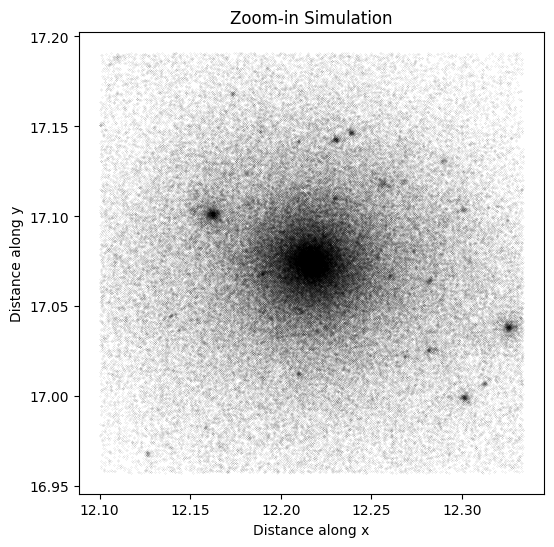

In [ ]:
# general code for preparing the plot
plt.figure(figsize=(6,6))
plt.xlabel("Distance along x")
plt.ylabel("Distance along y")
plt.title("Zoom-in Simulation")

# code for plotting dark matter particles
plt.scatter(eagle_zoom_in['dm']['coordinates'][:,0],
            eagle_zoom_in['dm']['coordinates'][:,1],
            c='black', s=0.01, alpha=0.4)

**Discuss:** Why do you think the center of the galaxy is not at $0, 0, 0$?

**Answer:** This galaxy is not at the centre of the box, but offset.

You can now follow the example to overlay `gas` particles on top of the dark matter particles. You do not need to modify `s` (tells your how big the size of the points should be) or `alpha` (tells you how transparent the points should appear). However, you should change `c`, which represents the color of the particles. Let's make it `green` for `gas`.

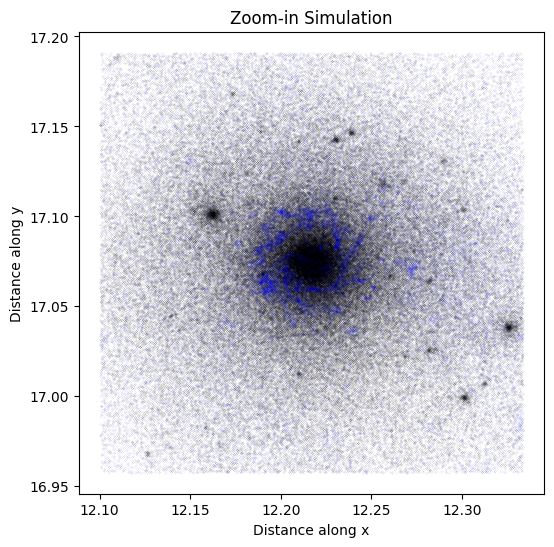

In [ ]:
# general code for preparing the plot
plt.figure(figsize=(6,6))
plt.xlabel("Distance along x")
plt.ylabel("Distance along y")
plt.title("Zoom-in Simulation")

# code for plotting dark matter particles
plt.scatter(eagle_zoom_in['dm']['coordinates'][:,0],
            eagle_zoom_in['dm']['coordinates'][:,1],
            c='black', s=0.01, alpha=0.4)

### your code here
plt.scatter(eagle_zoom_in['gas']['coordinates'][:,0],
            eagle_zoom_in['gas']['coordinates'][:,1],
            c='blue', s=0.01, alpha=0.4)

Let's keep going and now add `star` on the plot. Make the color `orange`.

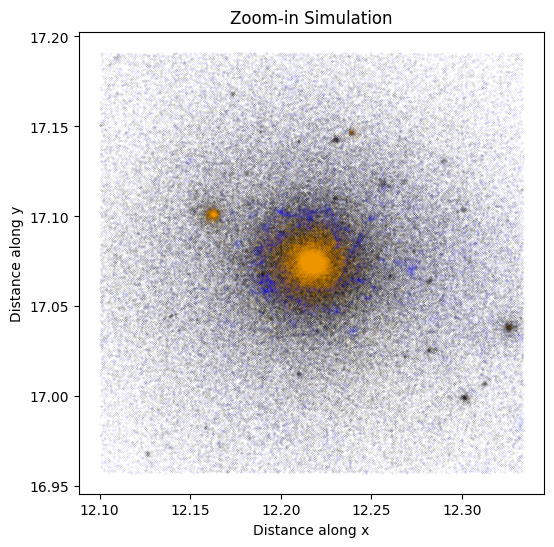

In [ ]:
# general code for preparing the plot
plt.figure(figsize=(6,6))
plt.xlabel("Distance along x")
plt.ylabel("Distance along y")
plt.title("Zoom-in Simulation")

# code for plotting dark matter particles
plt.scatter(eagle_zoom_in['dm']['coordinates'][:,0],
            eagle_zoom_in['dm']['coordinates'][:,1],
            c='black', s=0.01, alpha=0.4)

### your code here
plt.scatter(eagle_zoom_in['gas']['coordinates'][:,0],
            eagle_zoom_in['gas']['coordinates'][:,1],
            c='blue', s=0.01, alpha=0.4)

plt.scatter(eagle_zoom_in['star']['coordinates'][:,0],
            eagle_zoom_in['star']['coordinates'][:,1],
            c='orange', s=0.01, alpha=0.4)


Finally, we will now plot the black holes, `bh`. Make the color `red`.

Hint: You might notice there there are no black holes. But that is only because the number of black holes are so few compared to the number of other things. Try increasing the size parameter `s` inside the line corresponding to black holes.

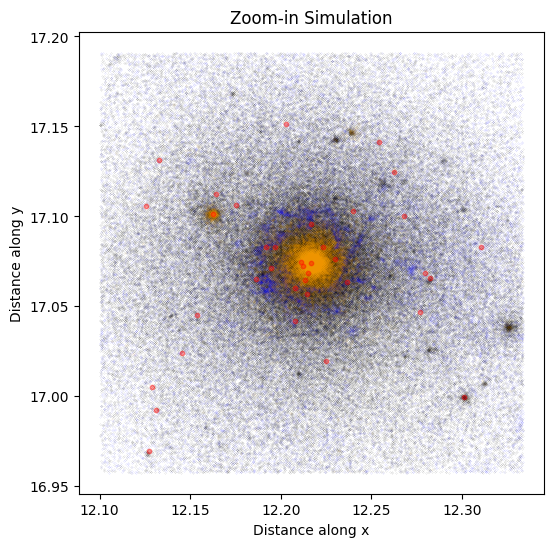

In [ ]:
# general code for preparing the plot
plt.figure(figsize=(6,6))
plt.xlabel("Distance along x")
plt.ylabel("Distance along y")
plt.title("Zoom-in Simulation")

# code for plotting dark matter particles
plt.scatter(eagle_zoom_in['dm']['coordinates'][:,0],
            eagle_zoom_in['dm']['coordinates'][:,1],
            c='black', s=0.01, alpha=0.4)

### your code here
plt.scatter(eagle_zoom_in['gas']['coordinates'][:,0],
            eagle_zoom_in['gas']['coordinates'][:,1],
            c='blue', s=0.01, alpha=0.4)

plt.scatter(eagle_zoom_in['star']['coordinates'][:,0],
            eagle_zoom_in['star']['coordinates'][:,1],
            c='orange', s=0.01, alpha=0.4)

plt.scatter(eagle_zoom_in['bh']['coordinates'][:,0],
            eagle_zoom_in['bh']['coordinates'][:,1],
            c='red', s=10, alpha=0.4)

Voila! Now you can see the zoomed-in galaxy in its full glory.

#### Bonus

Now looking at 2D data is already fun, but what is even more fun is looking at the full 3D data. After all, galaxies, like us, live in three-dimensions. The steps below will help you take a look at the full 3D structure of the galaxy. What's more, you can interact with the data and look at it from different viewpoints! We will be using a different Python package, `plotly`, to do this. If you haven't yet, go back to the second and third code cells in this notebook, uncomment the relevant lines, and run the code blocks.

Let's take a look at how we can plot the dark matter particles. Notice that once you plot it, you can turn the plot around by dragging it and you can also zoom in and out of it.

In [ ]:
fig = px.scatter_3d(x=eagle_zoom_in['dm']['coordinates'][:,0],
                     y=eagle_zoom_in['dm']['coordinates'][:,1],
                     z=eagle_zoom_in['dm']['coordinates'][:,2],
                     opacity=0.4)
fig.update_traces(marker=dict(size=0.3, color = 'black'))

fig.show()

Output hidden; open in https://colab.research.google.com to view.

Let's now overlay the gas particles on top of this. Notice how the syntax for this package is a little different. I had to create a different `fig2` and then add both inside `fig = go.Figure(data = fig1.data + fig2.data)`.

In [ ]:
fig1 = px.scatter_3d(x=eagle_zoom_in['dm']['coordinates'][:,0],
                     y=eagle_zoom_in['dm']['coordinates'][:,1],
                     z=eagle_zoom_in['dm']['coordinates'][:,2],
                     opacity=0.4)
fig1.update_traces(marker=dict(size=0.3, color = 'black'))

fig2 = px.scatter_3d(x=eagle_zoom_in['gas']['coordinates'][:,0],
                     y=eagle_zoom_in['gas']['coordinates'][:,1],
                     z=eagle_zoom_in['gas']['coordinates'][:,2],
                     opacity=0.4)
fig2.update_traces(marker=dict(size=0.3, color = 'blue'))


fig = go.Figure(data = fig1.data + fig2.data)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

Now add the final two objects, stars and black holes. Remember to change the size of black hole particles and also increase its `opacity` to 1.

In [ ]:
fig1 = px.scatter_3d(x=eagle_zoom_in['dm']['coordinates'][:,0],
                     y=eagle_zoom_in['dm']['coordinates'][:,1],
                     z=eagle_zoom_in['dm']['coordinates'][:,2],
                     opacity=0.4)
fig1.update_traces(marker=dict(size=0.3, color = 'black'))

fig2 = px.scatter_3d(x=eagle_zoom_in['gas']['coordinates'][:,0],
                     y=eagle_zoom_in['gas']['coordinates'][:,1],
                     z=eagle_zoom_in['gas']['coordinates'][:,2],
                     opacity=0.4)
fig2.update_traces(marker=dict(size=0.3, color = 'blue'))

fig3 = px.scatter_3d(x=eagle_zoom_in['star']['coordinates'][:,0],
                     y=eagle_zoom_in['star']['coordinates'][:,1],
                     z=eagle_zoom_in['star']['coordinates'][:,2],
                     opacity=0.4)
fig3.update_traces(marker=dict(size=0.3, color = 'orange'))

fig4 = px.scatter_3d(x=eagle_zoom_in['bh']['coordinates'][:,0],
                     y=eagle_zoom_in['bh']['coordinates'][:,1],
                     z=eagle_zoom_in['bh']['coordinates'][:,2],
                     opacity=1)
fig4.update_traces(marker=dict(size=2, color = 'red'))


fig = go.Figure(data = fig1.data + fig2.data + fig3.data + fig4.data)

#lines to change name of plot title and axis labels
fig.update_layout(scene = dict(
                    xaxis_title='Distance along x',
                    yaxis_title='Distance along y',
                    zaxis_title='Distance along z'),
                    width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Discuss:**

- How do you think the four main components of this galaxy are distributed with respect to each other?
- Which components are most correlated with each other? Why do you think they are correlated?
- Which component is different from the rest? Can you hypothesize why that might be so?

**Answer:**
- Everything else follows DM
- Gas is most correlated with DM, then stars trace gas.
- BHs. These are stars that went supernova, and probably got a kick in the process, pushing them out.

### Plotting the Cosmic Web

So far we have spent time looking at one galaxy. But remember that there are trillions of galaxy in our known Universe. So if we want to understand what is going on, we have to take an ever larger zoomed-out view of things. This is where the zoom-out simulation will come handy.

Let's first load up the zoom out simulation. (If you get an error, the ```zoom_out.pickle``` file has probably not finished uploading yet.  You can skip ahead to the next part and come back here when it's done!)

In [ ]:
eagle_zoom_out = np.load('zoom_out.pickle', allow_pickle=True)

This dictionary is exactly the same as the previous `eagle_zoom_in` dictionary. With that in mind, first let's make the usual 2D plots. Follow the same steps as before and produce a dark matter only plot.

However, keep in mind that the zoom-out simulation has many more data points than the zoom-in one. If we try to plot everything, we might crash the computer! To get around this issue, instead of `eagle_zoom_out['dm']['coordinates'][:,0]`, rewrite it as `eagle_zoom_out['dm']['coordinates'][::10,0]`. That change in the square bracket at the very end means that instead of plotting every point, plot every 10th point. So instead of $10$ million points, we will plot only $1$ million.

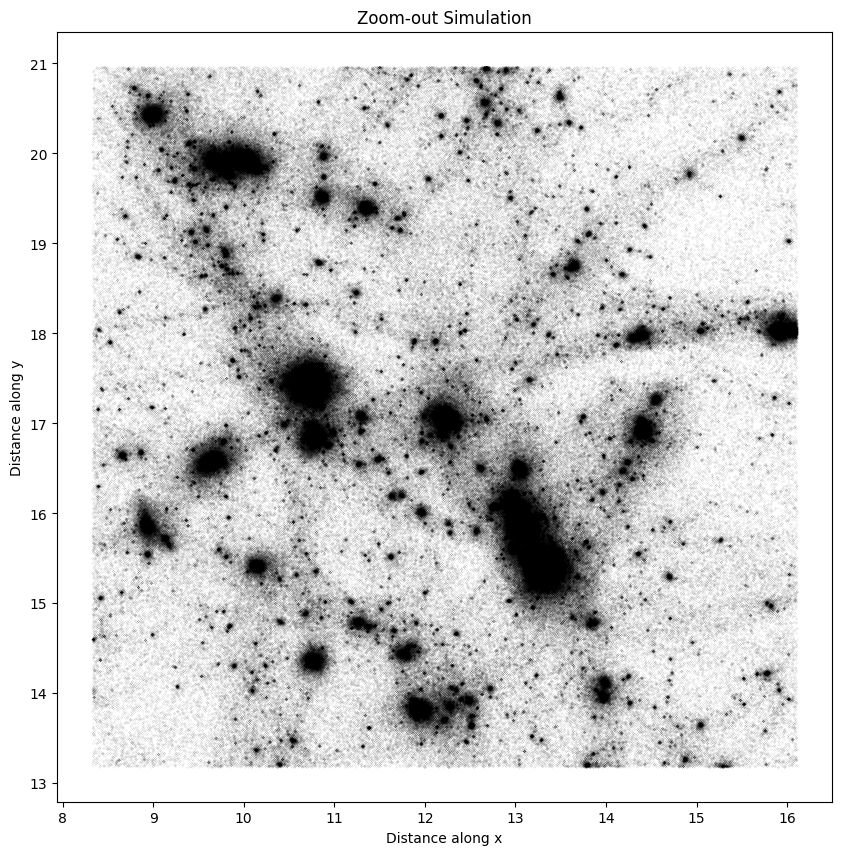

In [ ]:
# general code for preparing the plot
plt.figure(figsize=(10,10))
plt.xlabel("Distance along x")
plt.ylabel("Distance along y")
plt.title("Zoom-out Simulation")

# code for plotting dark matter particles
plt.scatter(eagle_zoom_out['dm']['coordinates'][::10,0],
            eagle_zoom_out['dm']['coordinates'][::10,1],
            c='black', s=0.01, alpha=0.4)

Now gradually add `gas`, `star` and `bh` on top of this plot. Remember to change the size of `bh`. Rather than adding all of the components at once, plot different combinations of them together and see how they correlate with each other at large scales.

**Discuss:** How are the different components related to each other at the zoom-out level compared to the zoom-in level? Does anything appear different?

**Answer:** Nope, it's the same.

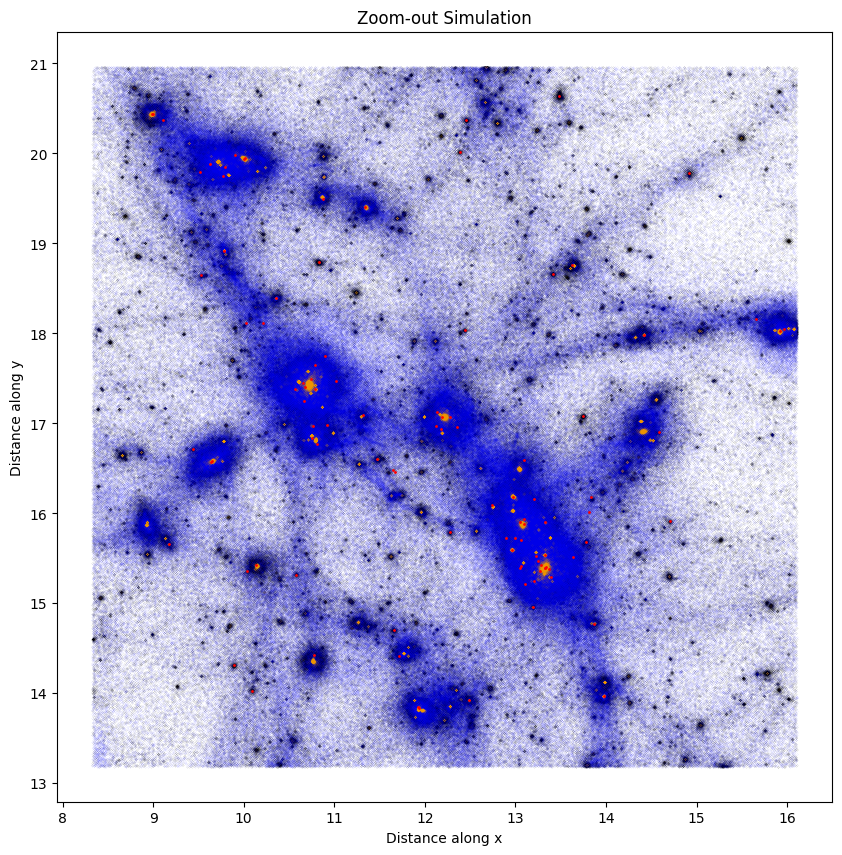

In [ ]:
# general code for preparing the plot
plt.figure(figsize=(10,10))
plt.xlabel("Distance along x")
plt.ylabel("Distance along y")
plt.title("Zoom-out Simulation")

# code for plotting dark matter particles
plt.scatter(eagle_zoom_out['dm']['coordinates'][::10,0],
            eagle_zoom_out['dm']['coordinates'][::10,1],
            c='black', s=0.01, alpha=0.4)

plt.scatter(eagle_zoom_out['gas']['coordinates'][::10,0],
            eagle_zoom_out['gas']['coordinates'][::10,1],
            c='blue', s=0.005, alpha=0.4)

plt.scatter(eagle_zoom_out['star']['coordinates'][::10,0],
            eagle_zoom_out['star']['coordinates'][::10,1],
            c='orange', s=0.01, alpha=0.4)

plt.scatter(eagle_zoom_out['bh']['coordinates'][::10,0],
            eagle_zoom_out['bh']['coordinates'][::10,1],
            c='red', s=1, alpha=1)

#### Bonus: 3D Plot

We will now look at the zoom-out simulation in 3D. Plotting even a million points in 3D might be a lot for our computer. So we will instead change things to `eagle_zoom_out['dm']['coordinates'][::100,0]` so only every 100th points are plotted.

In [ ]:
fig = px.scatter_3d( x=eagle_zoom_out['dm']['coordinates'][::100,0],
                     y=eagle_zoom_out['dm']['coordinates'][::100,1],
                     z=eagle_zoom_out['dm']['coordinates'][::100,2],
                     opacity=0.4)
fig.update_traces(marker=dict(size=0.3, color = 'black'))

fig.show()

Output hidden; open in https://colab.research.google.com to view.

Now let's progressively add the other components.

In [ ]:
fig1 = px.scatter_3d(x=eagle_zoom_out['dm']['coordinates'][::100,0],
                     y=eagle_zoom_out['dm']['coordinates'][::100,1],
                     z=eagle_zoom_out['dm']['coordinates'][::100,2],
                     opacity=0.4)
fig1.update_traces(marker=dict(size=0.3, color = 'black'))

fig2 = px.scatter_3d(x=eagle_zoom_out['gas']['coordinates'][::100,0],
                     y=eagle_zoom_out['gas']['coordinates'][::100,1],
                     z=eagle_zoom_out['gas']['coordinates'][::100,2],
                     opacity=0.4)
fig2.update_traces(marker=dict(size=0.3, color = 'blue'))

fig3 = px.scatter_3d(x=eagle_zoom_out['star']['coordinates'][::100,0],
                     y=eagle_zoom_out['star']['coordinates'][::100,1],
                     z=eagle_zoom_out['star']['coordinates'][::100,2],
                     opacity=0.4)
fig3.update_traces(marker=dict(size=0.3, color = 'orange'))

fig4 = px.scatter_3d(x=eagle_zoom_out['bh']['coordinates'][::100,0],
                     y=eagle_zoom_out['bh']['coordinates'][::100,1],
                     z=eagle_zoom_out['bh']['coordinates'][::100,2],
                     opacity=1)
fig4.update_traces(marker=dict(size=2, color = 'red'))


fig = go.Figure(data = fig1.data + fig2.data + fig3.data + fig4.data)

#lines to change name of plot title and axis labels
fig.update_layout(scene = dict(
                    xaxis_title='Distance along x',
                    yaxis_title='Distance along y',
                    zaxis_title='Distance along z'),
                    width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Discuss:**
- Why do you think the largest structure in the Universe is called the Cosmic Web?
- Are all the components of matter distributed evenly? If they are not, why do you think is causing it?

**Answer:**
- Kinda looks like a web of sorts.
- Not all even, mostly DM, then gas, then stars, then BH.  DM is just most abundant in the unvierse (80% of matter is DM, 20% is everything else).  Then, BHs are made out of stars, which are made out of gas, so makes sense for the hierarchy to sort itself the way that it has. Also follows cosmic web structure of nodes, filaments, and voids.

## Rotation Curves

Galaxy rotation curves are how Vera Rubin first conclusively showed the proof of dark matter. In this part of the notebook, we will take a look at how this method works.

The basic idea is similar to what Zwicky did in the Coma Clusters. We measure the rotational speeds of stars in a galaxy and also their distances from the centre of the galaxy. As a reminder, the speed tells us about the kinetic energy while the distance tells us about the potential energy of the stars. For the same distance from the centre of a galaxy, the rotational speed of stars will change depending on how much mass the galaxy has. The more massive it is, the more rotational speed we will see even at far away distances. This makes sense looking at our formula from above:
$$M_{\rm cluster} = \frac{v^2 r}{G},$$
A bigger $M_{\rm cluster}$ means a bigger $v$ as long as $r$ stays the same.

![Rotational Curves](https://upload.wikimedia.org/wikipedia/commons/c/cd/Rotation_curve_of_spiral_galaxy_Messier_33_%28Triangulum%29.png "Rotational Curves")

*Rotational Curve of M33 from [Wikipedia](https://en.wikipedia.org/wiki/Galaxy_rotation_curve). Note that "velocity" = "speed" for us!*


You can even take a look at how the presence and the absence of dark matter affects rotational speeds, especially at the outskirts of a galaxy in this [link](https://en.wikipedia.org/wiki/File:Galaxy_rotation_under_the_influence_of_dark_matter.ogv).

We will now use our zoom-in simulation to predict what the rotational velocity of various components of this galaxy should be! You can then try to compare this prediction with real data to test whether this particular EAGLE simulation got the physics right or not!

In [ ]:
# we will need galpy, so if you don't have it installed, run this cell the first time you use this notebook.  Comment it out afterwords

!pip install galpy

First, let's take a look at what the rotation curve of our own Milky Way looks like. This work is based on Jo Bovy's 2014 [paper](https://iopscience.iop.org/article/10.1088/0004-637X/759/2/131/meta).

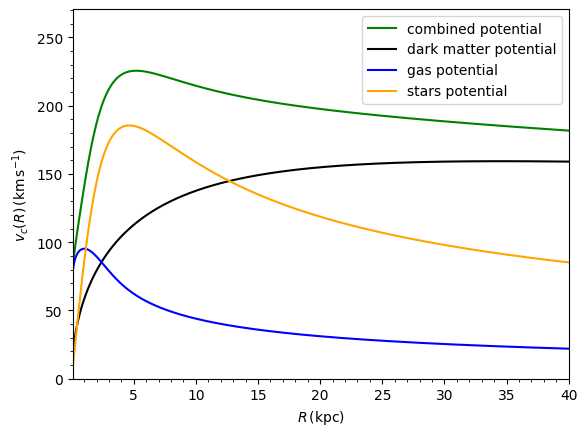

In [ ]:
from galpy.potential import plotRotcurve, MWPotential2014 as mwp14
from galpy.util.conversion import get_physical

mw_gas = mwp14[0]
mw_stars = mwp14[1]
mw_dm = mwp14[2]

plotRotcurve(mwp14,ro=8.,vo=220.,c='g', label='combined potential')
plotRotcurve(mw_dm,ro=8.,vo=220.,c='k',overplot=True, label='dark matter potential')
plotRotcurve(mw_gas,ro=8.,vo=220.,c='b',overplot=True, label='gas potential')
plotRotcurve(mw_stars,ro=8.,vo=220.,c='orange',overplot=True, label='stars potential')

plt.legend()

Now let's see how our EAGLE galaxy compares to real data!

####  Combine all particles

In the plot above above, we have drawn rotation curves for dark matter, gas, stars, and all elements combined.  We want to replicate this with our EAGLE simulation data. To do this, we will need to combine our data for each component (dark matter, gas, stars, and black holes) for both mass and coordinates.  This means we will just squash our arrays together into one big array.

We have written code for you to do this below.

In [ ]:
# All ptypes together
combined = {}
combined['mass'] = np.concatenate((eagle_zoom_in['gas']['mass'], eagle_zoom_in['dm']['mass'],
    eagle_zoom_in['star']['mass'], eagle_zoom_in['bh']['mass']))
combined['phys_coords'] = np.vstack((eagle_zoom_in['gas']['phys_coords'], eagle_zoom_in['dm']['phys_coords'],
    eagle_zoom_in['star']['phys_coords'], eagle_zoom_in['bh']['phys_coords']))

#### Step 1: Writing the expression for the rotation curve
Recall the equation we came up with when relating kinetic and potential energy:
$$M = \frac{v^2 r}{G}$$

Now, for rotation curves, we want to plot circular speed of the gas/stars/dark matter, $v$, on the $y$-axis and their distance from the centre of the galaxy, $r$, on the $x$-axis.  So, we will need to rewrite the above expression to solve for $v$ in terms of $r$.  All this means is that we want to isolate, or solve the equation, for $v$ on the left side, so on the right side we will have some expression with $G$, $M$, and $r$.  Since $G$ and $M$ are constants, this leaves a simple relationship between $v$ and $r$!

Try this now and write your expression in the text cell below (double click to type).

Write your expression for $v$ in terms of $r$ here:

**Answer:** $$v=\sqrt{\frac{MG}{r}}$$

#### Step 2: Calculating $r$

Now that we have an expression for our rotation curve, the next step is calcuating what to sub into that expression.  We'll start here with $r$.

$r$ is the distance of each particle in the simulation from the centre of the galaxy. To calculate this, we first need to find the centre of the galaxy.

We are providing you some additional information about the zoom-in galaxy. You will see inside the `eagle_box` dictionary that we have `position`, `velocities` and `radius` as properties. Their definitions are as follows:

- `position`: where the galaxy is located in the entire zoomed-out simulation. This helps us locate the specific galaxy in the larger simulation.
- `velocities`: This tells you what the velocity of the galaxy is with respect to everything else in the simulation. While individual particles inside the galaxy have velocities, the galaxy as a whole does too. Taking this value into account helps us tell apart how much of the speed of the particles is due to the motion of the galaxy itself. For example, imagine you throw a tennis ball at 5 m/s towards the front of a bus, and the bus itself is moving at 20 m/s. To an outside observer, the balls appears to move at 25 m/s. But if they know the speed of the bus, they can tell the speed of the ball with respect to the bus.
- `radius`: This tells you the distance you need to travel from the center of the galaxy to cover half of the total dark matter present in the galaxy.

In [ ]:
eagle_box = np.load('eagle_box.pickle', allow_pickle=True)
eagle_box

{'position': array([18.02714 , 25.194424, 65.77462 ], dtype=float32),
 'velocities': array([-281.5578  ,  -82.588745,  -94.163994], dtype=float32),
 'radius': 114.77974}

While for the large simulation it is convenient to give the galaxy some coordinates, for our analysis, we only have to worry about one galaxy. So it makes sense to shift the centre of this galaxy to the origin of our coordinate system. Let's start there first!

You are given the value of the coordinates of each particle inside `eagle_zoom_in['component']['phys_coords']`, where you can replace `component` with the four components we have. These coordinates too are based on the larger simulation. If we know that the centre of the galaxy is at `eagle_box['position']`, then all we have to do to shift our galaxy to the origin is subtract off this `eagle_box['position']` from our `eagle_zoom_in['component']['phys_coords']` coordinates.

Try this for all four components: dark matter, gas, stars, and all components combined (we are neglecting black holes because there are not enough of them to be interesting).

*Hint: You are only shifting things in x, y and z coordinate directions. The center should be (0, 0, 0).*

In [ ]:
# type your code here
centre = eagle_box['position']

dm_coordinates = eagle_zoom_in['dm']['phys_coords'] - centre
gas_coordinates = eagle_zoom_in['gas']['phys_coords'] - centre
star_coordinates = eagle_zoom_in['star']['phys_coords'] - centre
all_coordinates = combined['phys_coords'] - centre

To make sure that you have got it right, plot the dark matter and the gas particles the same way you plotted the zoom-in simulation earlier. Make plots along x and y axes. If you are feeling adventurous, you can take a look at it in 3D too!

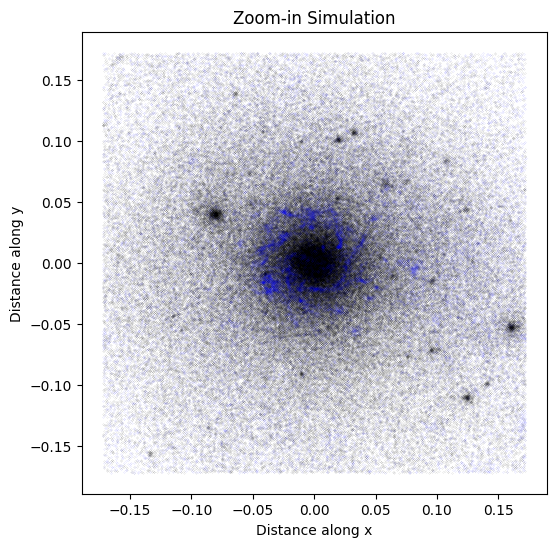

In [ ]:
# type your code here (2D plot)

# general code for preparing the plot
plt.figure(figsize=(6,6))
plt.xlabel("Distance along x")
plt.ylabel("Distance along y")
plt.title("Zoom-in Simulation")

# code for plotting dark matter particles
plt.scatter(dm_coordinates[:,0],
            dm_coordinates[:,1],
            c='black', s=0.01, alpha=0.4)

### your code here
plt.scatter(gas_coordinates[:,0],
            gas_coordinates[:,1],
            c='blue', s=0.01, alpha=0.4)

In [ ]:
# type your code here (3D plot)

fig1 = px.scatter_3d(x=dm_coordinates[:,0],
                     y=dm_coordinates[:,1],
                     z=dm_coordinates[:,2],
                     opacity=0.4)
fig1.update_traces(marker=dict(size=0.3, color = 'black'))

fig2 = px.scatter_3d(x=gas_coordinates[:,0],
                     y=gas_coordinates[:,1],
                     z=gas_coordinates[:,2],
                     opacity=0.4)
fig2.update_traces(marker=dict(size=0.3, color = 'blue'))


fig = go.Figure(data = fig1.data + fig2.data)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

Great! Now that we have the galaxy centred, we want to calculate the distance of each particle from the centre of the galaxy using the $(x,y,z)$ coordinates.  You may find this formala for calculating distances between 2 points familiar:
$$
\begin{align}
r &= \sqrt{\Delta x^2 + \Delta y^2 + \Delta z^2}\\
&= \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 + (z_1-z_2)^2}
\end{align}
$$

Since our second point is the origin, $(0,0,0)$, we can rewrite our distance formula:
$$
r = \sqrt{x^2 + y^2 + z^2}
$$

**Coding tip**: It is pretty easy to code up this equation, but if you're looking for another easy way to do this with python for all all of our particles is using the [`np.linalg.norm` fucntion](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

In [ ]:
# type your code here
dm_r = np.sqrt(dm_coordinates[:,0]**2 + dm_coordinates[:,1]**2 + dm_coordinates[:,2]**2)
gas_r = np.sqrt(gas_coordinates[:,0]**2 + gas_coordinates[:,1]**2 + gas_coordinates[:,2]**2)
star_r = np.sqrt(star_coordinates[:,0]**2 + star_coordinates[:,1]**2 + star_coordinates[:,2]**2)
all_r = np.sqrt(all_coordinates[:,0]**2 + all_coordinates[:,1]**2 + all_coordinates[:,2]**2)


# note for answer key: can also use for loops or np.linalg.norm
# dm_r = np.linalg.norm(dm_coordinates, axis=1)

Next, we need to order are positions from smallest $r$ to biggest $r$.  This is quite simple when using a mask and the `np.argsort` tool:

In [ ]:
# dm example
dm_mask = np.argsort(dm_r)
dm_r = dm_r[dm_mask]

# type your code here
gas_mask = np.argsort(gas_r)
gas_r = gas_r[gas_mask]

star_mask = np.argsort(star_r)
star_r = star_r[star_mask]

all_mask = np.argsort(all_r)
all_r = all_r[all_mask]

Finally, we need to convert our $r$'s from Mpc to kpc (these are just units for distance, but they are muchhhh bigger than the metre since space is so vast!).  You may find this relation helpful:
* $1\,\rm{Mpc}=10^{3}\,\rm{kpc}$

In [ ]:
# type your code here
dm_r *= 1000
gas_r *= 1000
star_r *= 1000
all_r *= 1000

#### Step 3: Calculating $M$

Now we want to calculate the masses we will be subbing into our rotation curve equation.  This is a bit more complicated.  

To do this, we want to imagine drawing a circle at the $r$ we calcaulted for each particle above, and adding up all the mass enclosed within that circle. In the image below, we drew a yellow circle with radius $r_1$, so $M_1$ is the total mass of all the stars and gas located inside of that circle.  Similarly, the purple circle shows all the mass $M_4$ inside of a circle with radius $r_4$.  Basically, for each particle in the simulation, we want to add up the masses of all other the particles between it and the centre of the galaxy!

![Circles](https://i.postimg.cc/768rmCPs/Screenshot-2024-06-26-at-12-44-02-AM.png "Circles")

It's important to remember that each particle has a distance $r$ and a mass $m$ associated with it.  

First, we'll need to re-order our mass arrays such that the $r$ corresponding to each $m$ (`eagle_zoom_in['component']['mass']`) is again in increasing order.  This means we want all of our particle masses to be ordered from those closest to the galaxy cetre to those furthest from the centre. Try this now.

*Hint: Lucky for us we already have a mask to do this!*

In [ ]:
# type your code here
dm_masses = eagle_zoom_in['dm']['mass'][dm_mask]
gas_masses = eagle_zoom_in['gas']['mass'][gas_mask]
star_masses = eagle_zoom_in['star']['mass'][star_mask]
all_masses = combined['mass'][all_mask]

Now that everything is ordered properly, for each particle, we want to add up the mass $M$ of all the particles closer to the centre than it. The sketch below should help give you an idea. The orange particle is at distance $r_0$ and has mass $m_0$, so the total mass will be $M_0=m_0$.  The green particle is further away at $r_1$, so the total mass will be the sum of the masses of the orange and green particles, $M_1=m_0+m_1$, and so on.

[![Screenshot-2024-06-26-at-12-59-18-AM.png](https://i.postimg.cc/j57PY1bq/Screenshot-2024-06-26-at-12-59-18-AM.png)](https://postimg.cc/VrzdjDv2)


So, we want to create a new array such that:
* term 0 = term 0
* term 1 = term 0 + term 1
* term 2 = term 0 + term 1 + term 2
* etc
(because remember, we are adding up the masses of all the particles within distance $r_0$, $r_1$, $r_2$, etc).

*Hint: you may find [`np.cumsum` (for cumulative sum)](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) helpful.*

In [ ]:
# type your code here

dm_cmass = np.cumsum(dm_masses)
gas_cmass = np.cumsum(gas_masses)
star_cmass = np.cumsum(star_masses)
all_cmass = np.cumsum(all_masses)

#### Step 4: Calculate G

Recall G is Newton's Gravitational constant, given in SI units as
$$G=6.67430\times10^{-11}\frac{\rm{m}^3}{\rm{kg\, s}^2}.$$

But astronomers don't plot rotation curves in SI units. Instead, they plot $v$ in km/s and $r$ in kpc (this is just another unit for distance!).  

So, we need to convert $G$ into units of:
$$\frac{\rm{km}^2\rm{kpc}}{\rm{M}_\odot\rm{s}^2}$$

Try this conversion yourself using the following conversion values:
* $1\,\rm{m}^2 = 10^{-6}\,\rm{km}^2$
* $1\,\rm{m} = 3.2407793\times10^{-20}\,\rm{kpc}$
* $1\,\rm{kg}=5.0291442\times10^{-31}\,\rm{M}_\odot$

*Hint: try rewriting the SI units as $$\frac{\rm{m}^2\rm{m}}{\rm{kg\, s}^2}.$$*

In [ ]:
# your code here
G = 6.6743e-11

myG = G * 1e-6 * 3.2407793e-20 / (5.0291142e-31)
myG

4.300942953729306e-06

#### Step 5: Computing $v$ and plotting the rotation curve

Now we are at the final step! First, we need to compute $v$ using the formula we derived in Step 1.  Do that in the cell below.

In [ ]:
# your code here
dm_v = np.sqrt((myG * dm_cmass) / dm_r)
gas_v = np.sqrt((myG * gas_cmass) / gas_r)
star_v = np.sqrt((myG * star_cmass) / star_r)
all_v = np.sqrt((myG * all_cmass) / all_r)


And plot it!

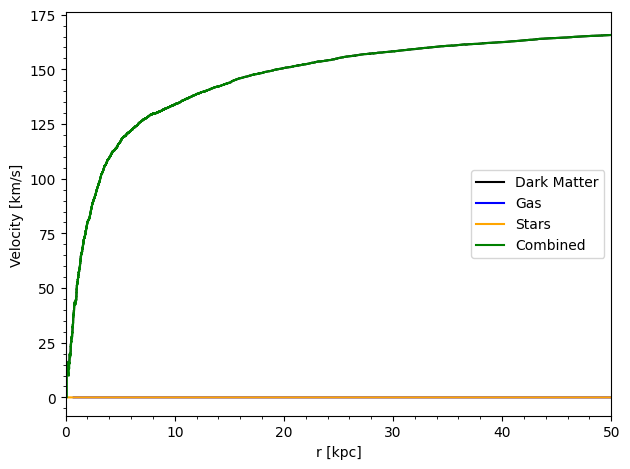

In [ ]:
plt.plot(dm_r, dm_v, c='k', label = "Dark Matter")
plt.plot(gas_r, gas_v, c='b', label = "Gas")
plt.plot(star_r, star_v, c='orange', label = "Stars")
plt.plot(all_r, all_v, c='g', label = "Combined")

plt.legend()
plt.minorticks_on()
plt.ylabel('Velocity [km/s]'); plt.xlabel('r [kpc]')
plt.xlim(0, 50); plt.tight_layout()
plt.show()
plt.close()

You may notice you can't see all the curves! To fix this, try plotting the lines with different styles using:
* `ls='-'`
* `ls=':'`
* `ls='-.'`
* `ls='--'`

Also, try "normalizing" your curves.  This means dividing each curve by its maximum $v$ value, so that we can better compare the shapes of curves with different heights.  

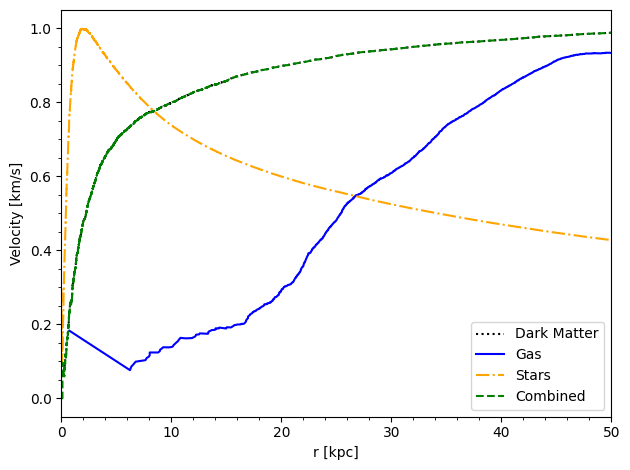

In [ ]:
plt.plot(dm_r, dm_v/max(dm_v), c='k', ls = ':', label = "Dark Matter")
plt.plot(gas_r, gas_v/max(gas_v), c='b', ls = '-', label = "Gas")
plt.plot(star_r, star_v/max(star_v), c='orange', ls = '-.', label = "Stars")
plt.plot(all_r, all_v/max(all_v), c='g', ls = '--', label = "Combined")

plt.legend()
plt.minorticks_on()
plt.ylabel('Velocity [km/s]'); plt.xlabel('r [kpc]')
plt.xlim(0, 50); plt.tight_layout()
plt.show()
plt.close()

**Discussion:**
* Why are the gas and star curves so much smaller than the dark matter curve?
* What does the shape and size of the "combined" curve tell us?
* Compare the stars curve to the one shown above when introducing rotation curves.
* How well does EAGLE reproduce Jo Bovy's results?

**Answer:**
* There are way fewer gas and star particles than dark matter particles, so they are drowned out.
* The combined curve follows the expectation for a rotation curve with DM!
* Stars curve follows "expected from visible disk" curve!
* Quantitatively, poorly. Qualitatively, okay-ish.

#### Bonus plot

You can run the following line to generate a cool image of the large-scale structure, typically seen in scientific illustrations. Instead of plotting every object, we instead add up objects that are very close to each other and the higher the number, the brigher that part of the simulation turns out to be.

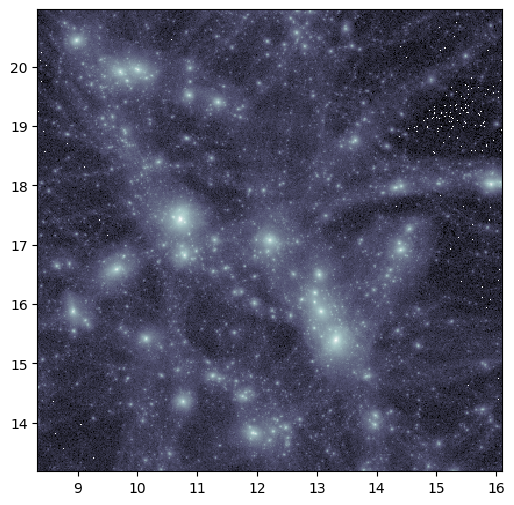

In [ ]:
### DM

from matplotlib.colors import LogNorm

plt.figure(figsize=(6,6))
plt.hist2d(eagle_zoom_out['dm']['coordinates'][:,0],eagle_zoom_out['dm']['coordinates'][:,1],
           bins=400,cmap='bone',norm=LogNorm());

## Extra Credit: Try this with IllustrisTNG!

[IllustrisTNG](https://www.tng-project.org/) is a next-generation simulation with a much higher resolution and different physical models than EAGLE. You can compare your results from EAGLE with IllustrisTNG to see what each of these theories predict.

By now, you can may have developed a better idea on how to do this. You will basically follow what you have done until now. Below, we provide you with the relevant simulation data. This time, we provide only the zoom-in data and the information about the velocity of components of the zoom-in galaxy. Go ahead, follow the steps you have followed thus far, and see what IllustrisTNG tells you about our Universe!

In [ ]:
tng = np.load('tng.pickle', allow_pickle=True) #zoom-in galaxy
tng_box = np.load('tng_box.pickle', allow_pickle=True) #zoom-in galaxy's velocity information

Answer key only

In [ ]:
centre = tng_box['position']

In [ ]:
def compute_rot_curve(ptype):
    # compute distance to centre
    r = np.linalg.norm(ptype['phys_coords'] - centre, axis=1)
    mask = np.argsort(r)
    r = r[mask]

    # Compute cumulative mass
    cmass = np.cumsum(ptype['Masses'][mask])

    # Compute velocity.
    v = np.sqrt((myG * cmass) / r)

    # Return r in Mpc and v in km/s.
    return r, v

In [ ]:
# All ptypes together
combined = {}
combined['Masses'] = np.concatenate((tng['gas']['Masses'], tng['dm']['Masses'],
    tng['star']['Masses'], tng['bh']['Masses']))
combined['phys_coords'] = np.vstack((tng['gas']['phys_coords'], tng['dm']['phys_coords'],
    tng['star']['phys_coords'], tng['bh']['phys_coords']))

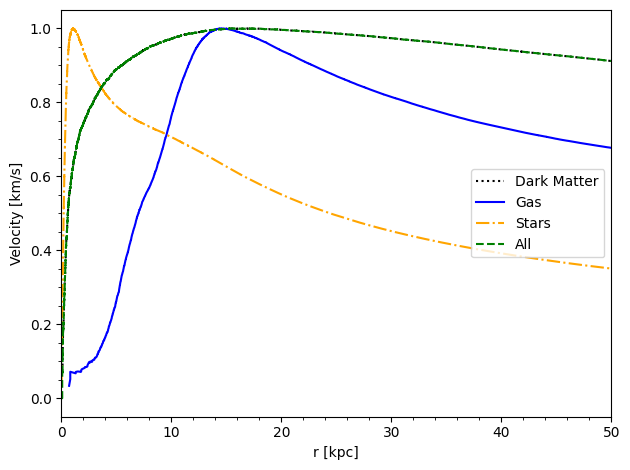

In [ ]:
# Loop over each parttype.
for ptype, lab, c, ls in zip([tng['dm'],tng['gas'],tng['star'], combined],
                ['Dark Matter', 'Gas', 'Stars', 'All'], ['k','b','orange','g'],[':','-','-.','--']):
    r, v = compute_rot_curve(ptype)
    plt.plot(r, v/max(v), label=lab, c=c, ls=ls)

# Save plot.
plt.legend(loc='center right')
plt.minorticks_on()
plt.ylabel('Velocity [km/s]'); plt.xlabel('r [kpc]')
plt.xlim(0, 50); plt.tight_layout()
# plt.savefig('RotationCurve.png')
plt.show()
plt.close()

# Solutions

## Writing the expression for the rotation curve
$$v=\sqrt{\frac{MG}{r}}$$

## $G$ in units of $\frac{\rm{km}^2\rm{kpc}}{\rm{M}_\odot\rm{s}^2}$
$$
\begin{align}
G&=6.6743\times10^{-11}\frac{\rm{m}^2\rm{m}}{\rm{kg}\rm{s}^2}\\
G&= 6.6743\times10^{-11}\times\frac{1\times10^{-6}\rm{km}^2}{1\cancel{\rm{m}^2}}\times\frac{3.2407793\times10^{-20}\rm{kpc}}{1\cancel{\rm{m}}} \times \frac{{1 \cancel{\rm{kg}}}}{5.0291442\times10^{-31}\rm{M}_\odot}\times\frac{\cancel{\rm{m}^2}\cancel{\rm{m}}}{\cancel{\rm{kg}}\rm{s}^2}\\
G&=4.3009\times10^{-6}\frac{\rm{km}^2\rm{kpc}}{\rm{M}_\odot\rm{s}^2}
\end{align}$$